In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
import math
from py4j.java_gateway import JavaGateway, GatewayParameters

In [39]:
gateway = JavaGateway(gateway_parameters=GatewayParameters(auto_field=True, auto_convert=True))
app = gateway.entry_point


In [43]:
def coherentMagCrustal(area):
    return math.log10(area * 1e-6 * pow(10, 4.2))

def coherentMagSubduction(area):
    return math.log10(area * 1e-6 * pow(10, 4.0))

In [41]:
rupset_path = "../GNS/rupture sets/NZSHM22_RuptureSet-UnVwdHVyZUdlbmVyYXRpb25UYXNrOjEwMDAzOA==.zip"
rup_set = app.loadRupSet(rupset_path)

orig_mags = rup_set.getMagForAllRups()
np_orig = np.array(orig_mags)
mag_est = np.array([coherentMagCrustal(rup_set.getAreaForRup(i)) for i in range(len(orig_mags))])
difference = np.subtract(np_orig, mag_est)
len(orig_mags)

411270

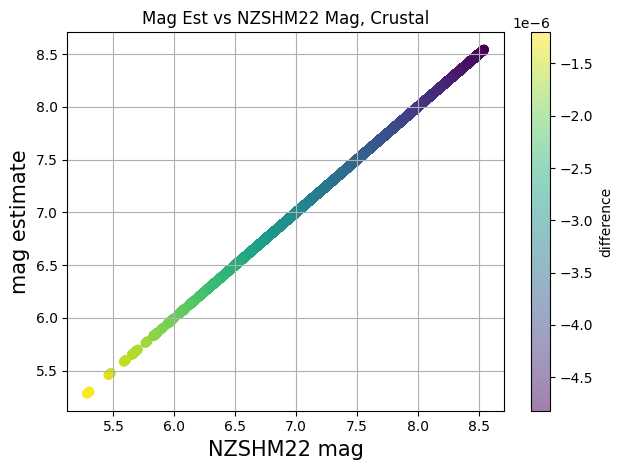

In [42]:
fig, ax = plt.subplots()
scatter = ax.scatter(np_orig, mag_est, c=difference, alpha=0.5)

ax.set_xlabel(r'NZSHM22 mag', fontsize=15)
ax.set_ylabel(r'mag estimate', fontsize=15)
ax.set_title('Mag Est vs NZSHM22 Mag, Crustal')
cbar = plt.colorbar(scatter)
cbar.set_label("difference")
ax.grid(True)
fig.tight_layout()

plt.show()

In [44]:
rupset_path = "../GNS/rupture sets/RupSet_Sub_FM(SBD_0_3_HKR_LR_30)_mnSbS(2)_mnSSPP(2)_mxSSL(0.5)_ddAsRa(2.0,5.0,5)_ddMnFl(0.1)_ddPsCo(0.0)_ddSzCo(0.0)_thFc(0.0).zip"
rup_set = app.loadRupSet(rupset_path)

orig_mags = rup_set.getMagForAllRups()
np_orig = np.array(orig_mags)
mag_est = np.array([coherentMagSubduction(rup_set.getAreaForRup(i)) for i in range(len(orig_mags))])
difference = np.subtract(np_orig, mag_est)
len(orig_mags)

23675

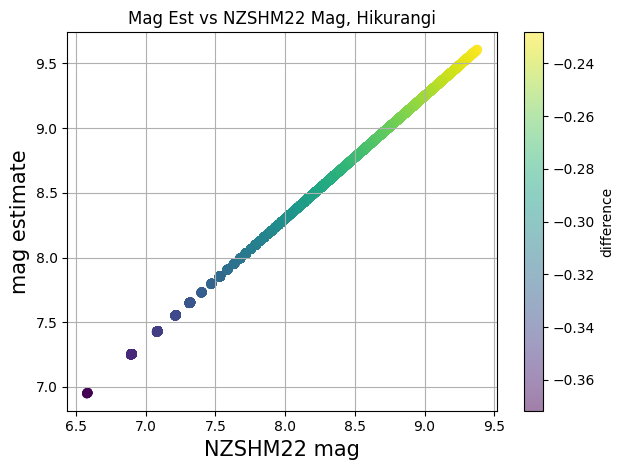

In [46]:
fig, ax = plt.subplots()
scatter = ax.scatter(np_orig, mag_est, c=difference, alpha=0.5)

ax.set_xlabel(r'NZSHM22 mag', fontsize=15)
ax.set_ylabel(r'mag estimate', fontsize=15)
ax.set_title('Mag Est vs NZSHM22 Mag, Hikurangi')
cbar = plt.colorbar(scatter)
cbar.set_label("difference")
ax.grid(True)
fig.tight_layout()

plt.show()

In [60]:
rupset_path = "../GNS/rupture sets/mergedRupset_5km_cffPatch2km_cff0SelfStiffness.zip"
rup_set = app.loadRupSet(rupset_path)
sections = rup_set.getFaultSectionDataList()
section_areas = [s.getArea(False) for s in sections]
section_subduction = ["row:" in s.getSectionName() for s in sections]   
ruptures = rup_set.getSectionIndicesForAllRups()

In [63]:
def getAreas(rupture_id):
    s = ruptures[rupture_id]
    crust_area = sum([section_areas[s] for s in s if not section_subduction[s]])
    subdu_area = sum([section_areas[s] for s in s if section_subduction[s]])
    return [crust_area, subdu_area]

In [64]:
rupture_areas = [getAreas(r) for r in range(rup_set.getNumRuptures())]

In [65]:
rupture_areas[0]

[883437928.6359421, 899787209.7567065]

In [66]:
def coherentMagCrustal(area):
    return math.log10(area * 1e-6 * pow(10, 4.2))

def coherentMagSubduction(area):
    return math.log10(area * 1e-6 * pow(10, 4.0))

def magEstimate(crustalA, subductionA):
#    subductionA = sum([s.getArea(False) for s in sections if "row:" in s.getSectionName()])
#    crustalA = sum([s.getArea(False) for s in sections if "row:" not in s.getSectionName()])
    return math.log10(subductionA * 1e-6 * pow(10, 4.0) + crustalA * 1e-6 * pow(10, 4.2))

magEstimate(*rupture_areas[0])
    

7.361716878216762

In [68]:
sub_mags = [magEstimate(*a) for a in rupture_areas]

In [69]:
sub_mags[0]

7.361716878216762

In [72]:
areas = [(a[0]+a[1])*1e-6 for a in rupture_areas]

In [75]:
difference = [(a[0]/a[1]) for a in rupture_areas]

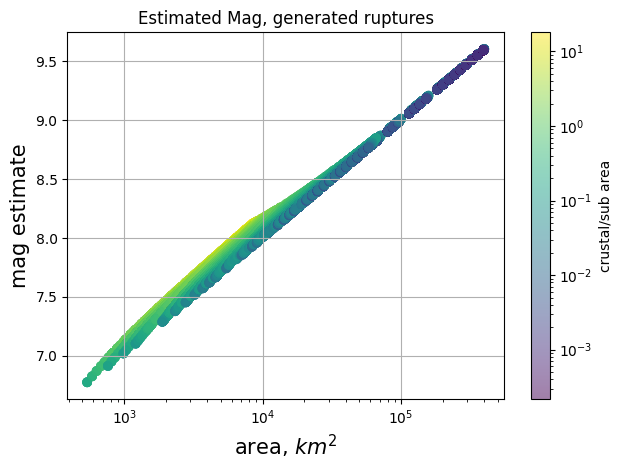

In [86]:
fig, ax = plt.subplots()
scatter = ax.scatter(areas, sub_mags, c=difference, alpha=0.5, norm=colors.LogNorm())

ax.set_xlabel(r'area, $km^2$', fontsize=15)
ax.set_ylabel(r'mag estimate', fontsize=15)
ax.set_title('Estimated Mag, generated ruptures')
ax.set_xscale('log')
cbar = plt.colorbar(scatter)
cbar.set_label("crustal/sub area")
ax.grid(True)
fig.tight_layout()

plt.show()